### importing libraries





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier


### **Loading the data using API command **

In [ ]:
!kaggle datasets download -d ramjaslangdi/ibm-hr-analytics-attrition-dataset

Dataset URL: https://www.kaggle.com/datasets/ramjaslangdi/ibm-hr-analytics-attrition-dataset
License(s): apache-2.0
ibm-hr-analytics-attrition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/ibm-hr-analytics-attrition-dataset.zip


Archive:  /content/ibm-hr-analytics-attrition-dataset.zip
replace WA_Fn-UseC_-HR-Employee-Attrition.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv('/content/ibm-hr-analytics-attrition-dataset.zip')

### Explore

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#check null values
df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
#check for duplicate
df.duplicated().sum()

0

In [ ]:
#to get numerical cols
num_cols=df.describe().columns
# to get categorical cols
catg_cols = set(df.columns) - set(num_cols)

In [ ]:
for col in catg_cols:
  print(f'{df[col].value_counts()}\n')

OverTime
No     1054
Yes     416
Name: count, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

Gender
Male      882
Female    588
Name: count, dtype: int64

Over18
Y    1470
Name: count, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Marital

all employees are Over18

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


0.41286446154785084


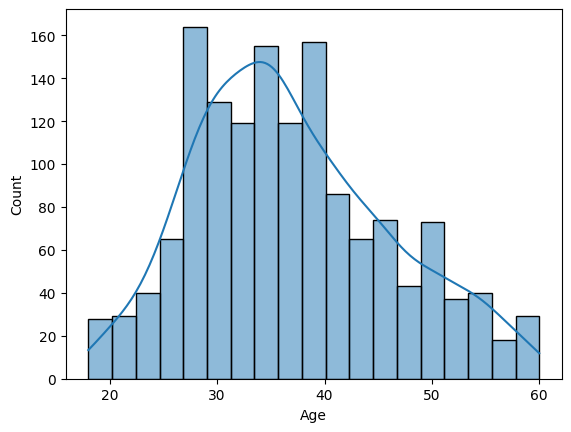

-0.003514976958291024


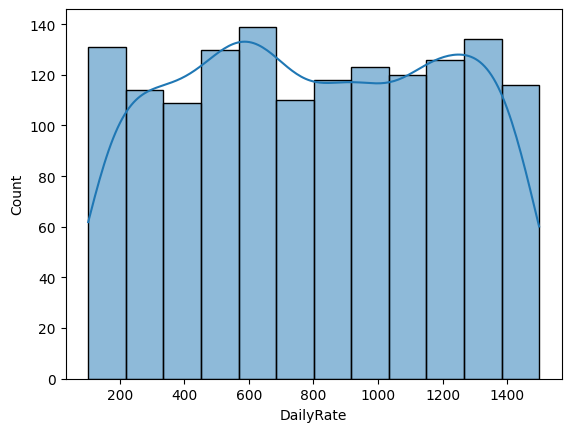

0.9571400469829039


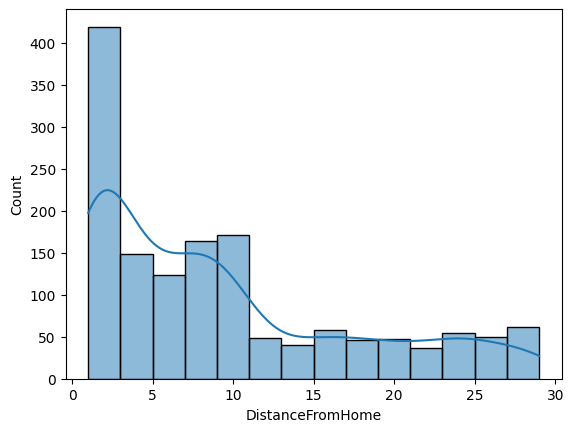

-0.2893854052028825


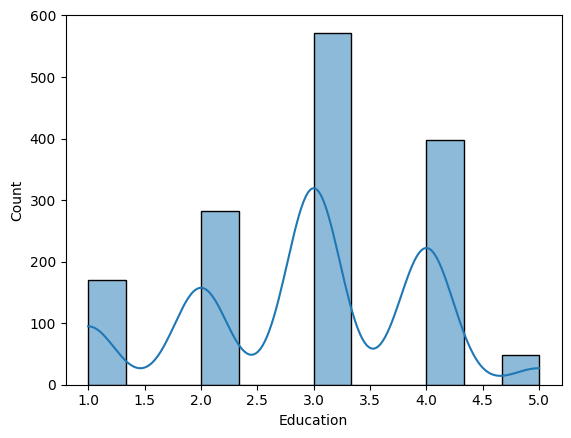

<ipython-input-266-f0690b432a53>:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(skew(df[col]))


nan


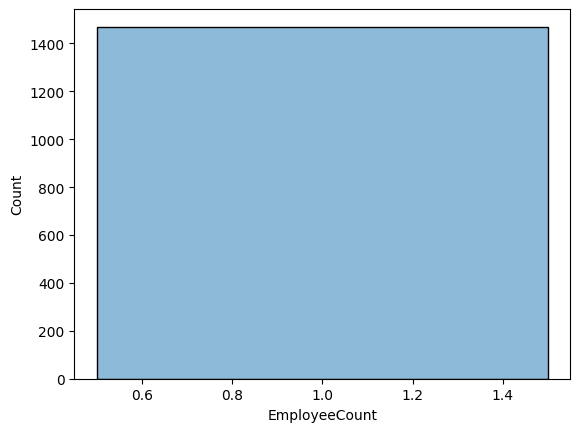

0.01655710251921753


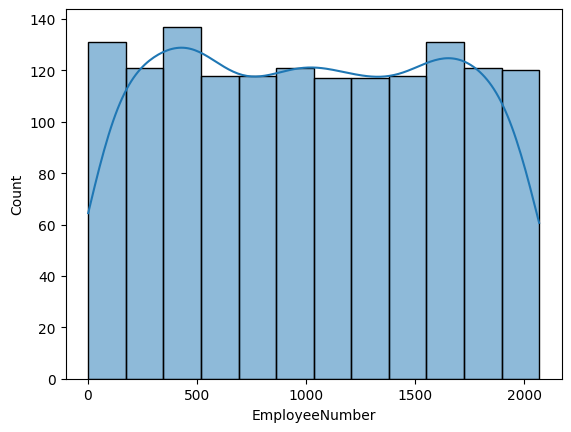

-0.3213261358382832


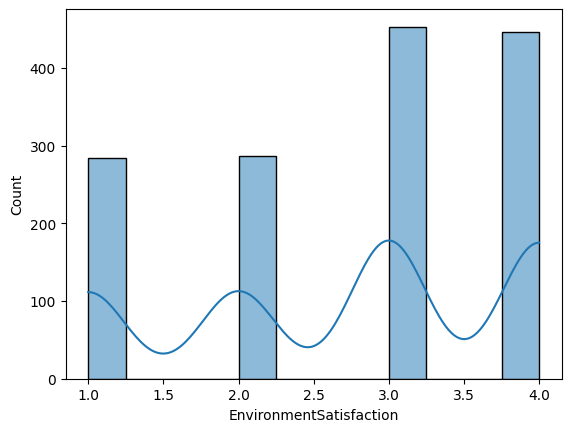

-0.03227797319055416


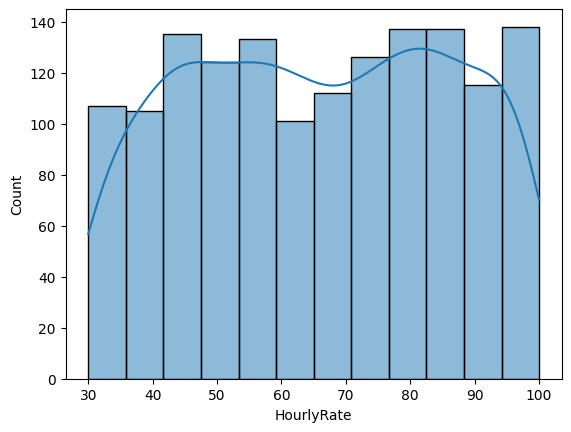

-0.4979106286269671


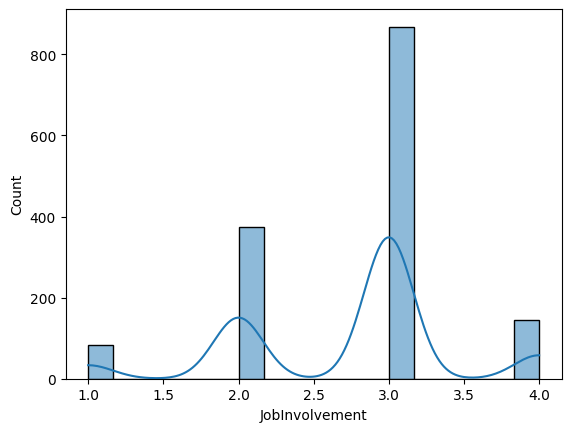

1.0243546583925869


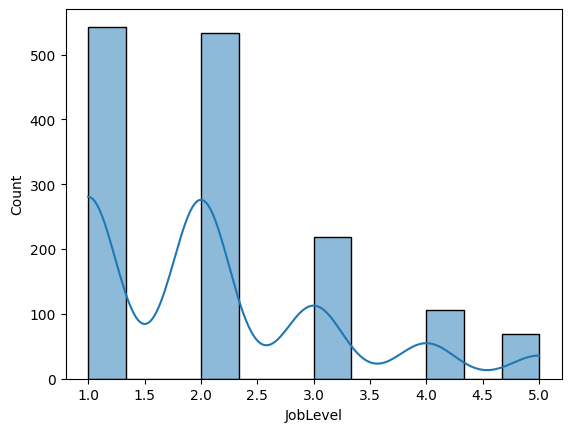

-0.3293354633089524


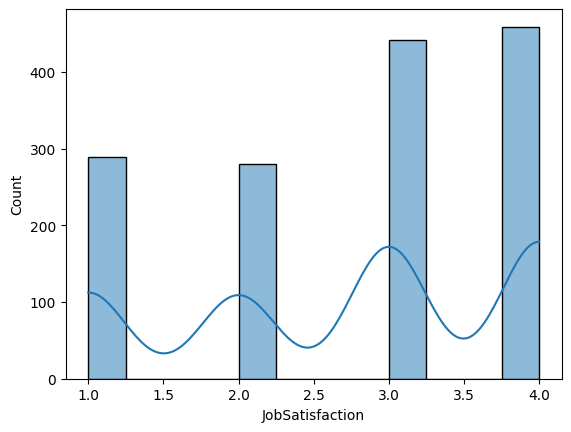

1.3684185123330814


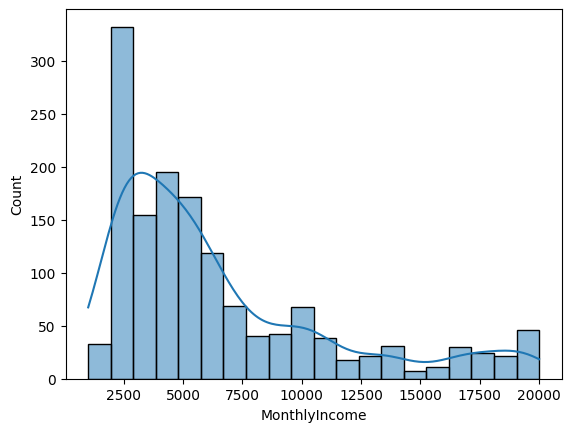

0.01855884556846042


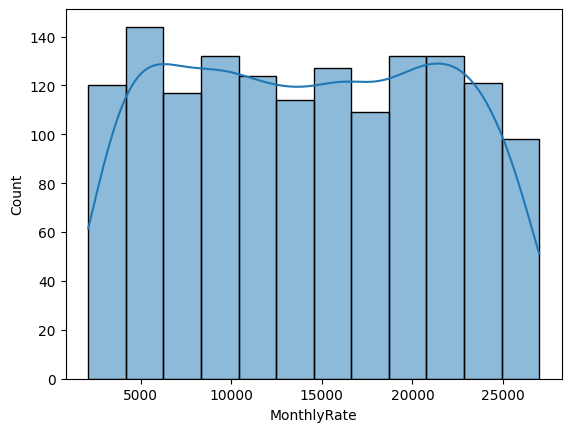

1.0254233954371303


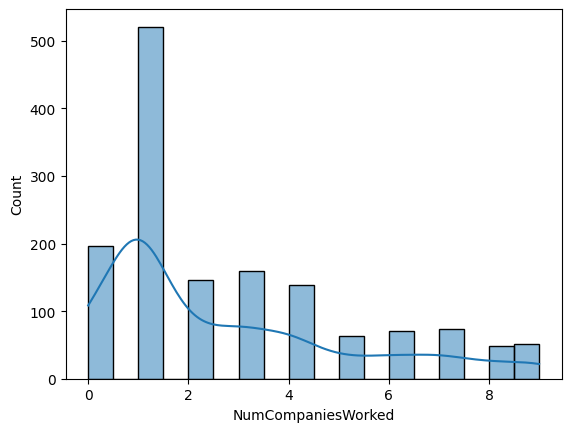

0.8202898522796266


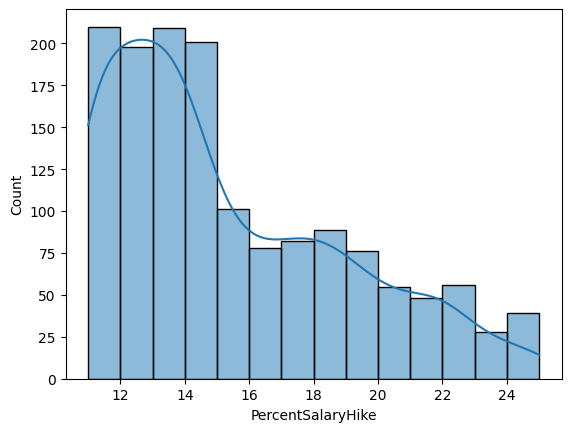

1.9199210412109473


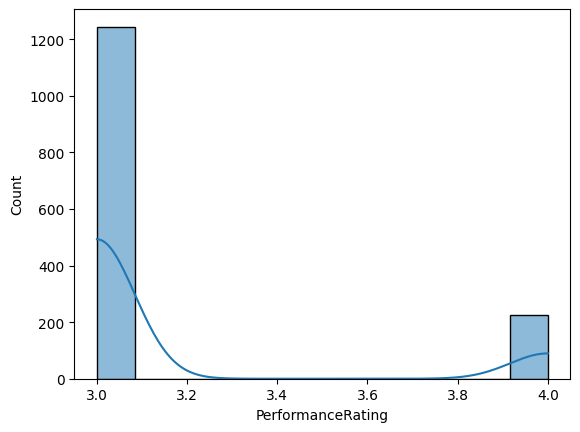

-0.3025184698222079


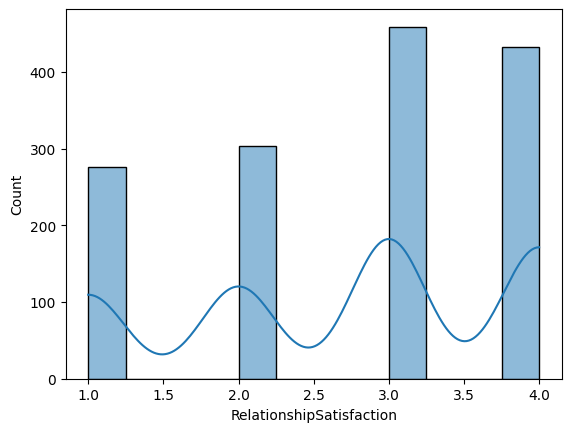

nan


<ipython-input-266-f0690b432a53>:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(skew(df[col]))


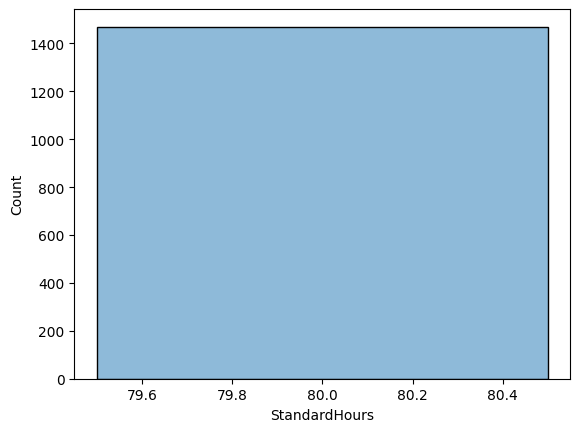

0.9679912809556104


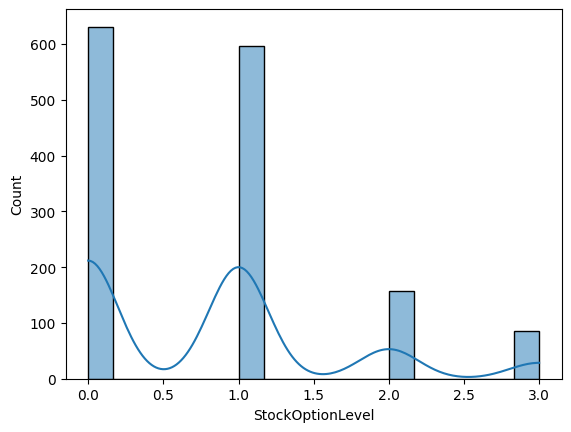

1.11603155825941


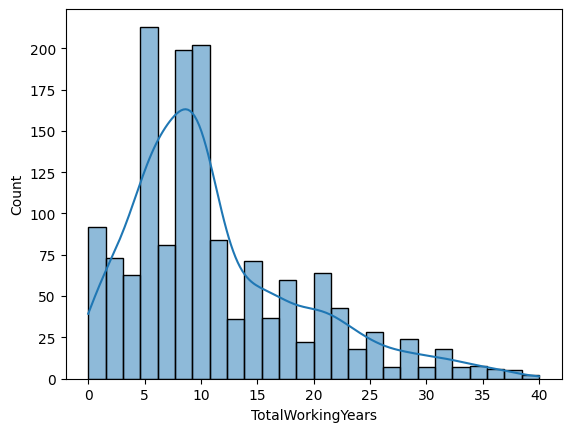

0.5525595985771926


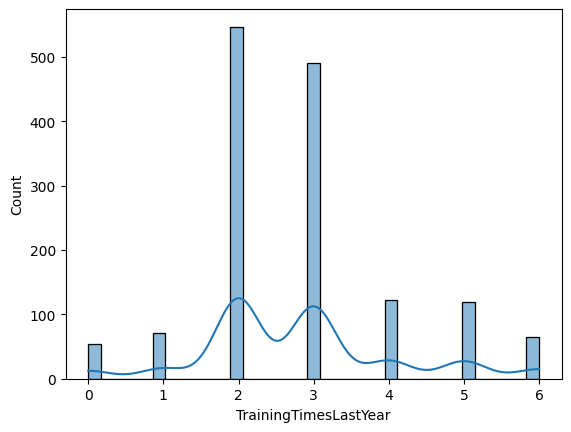

-0.5519163838185224


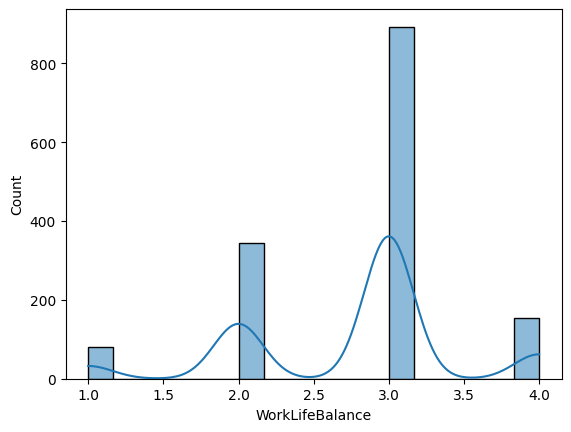

1.7627284034822992


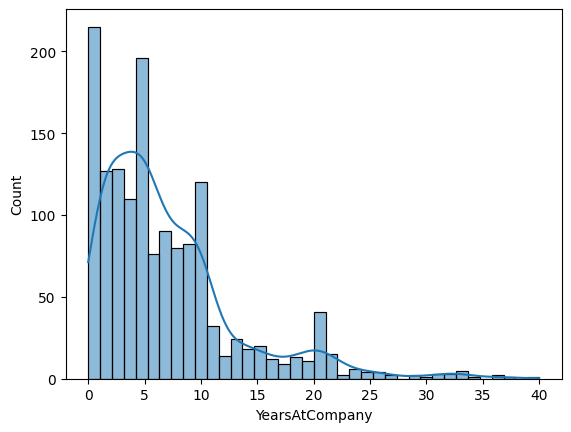

0.9164268059808774


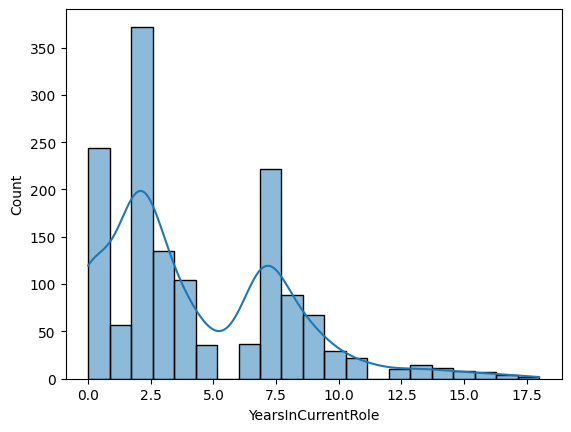

1.982264623462895


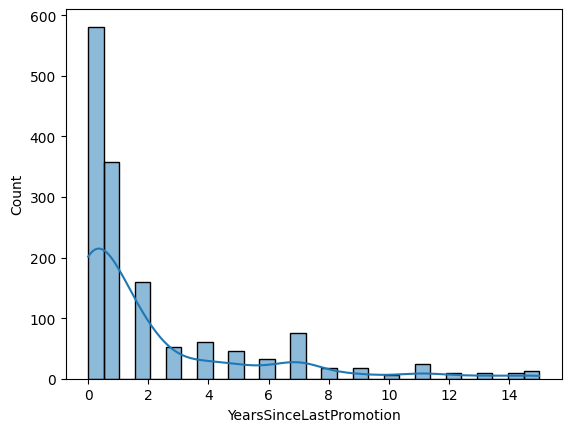

0.8326002906209379


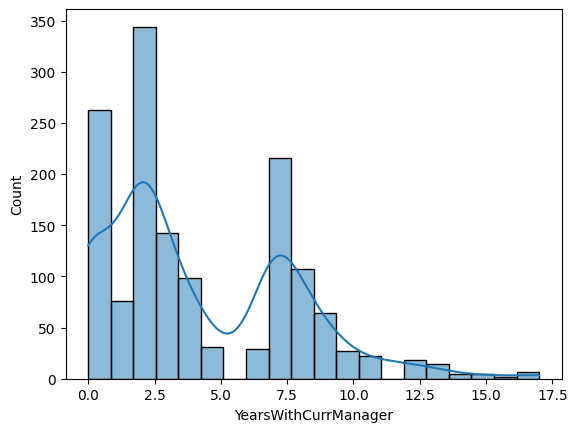

In [ ]:
#see distribution of data  check for skewness
for col in num_cols:
  print(skew(df[col]))
  sns.histplot(df[col] , kde=True)
  plt.show()

**columns that has skewness **
<br>
 ditance from home , joblevel ,montlyincome,numcomworked,percentsalary , performing rate,stockoptional,totalworking year,,yearsatcompany ,yearsincurrentrole , yearssincelastpromotion,yearswithcurrent
 <br>
 **i will check corr to decidec columns that has very weak realationship to normalize it **


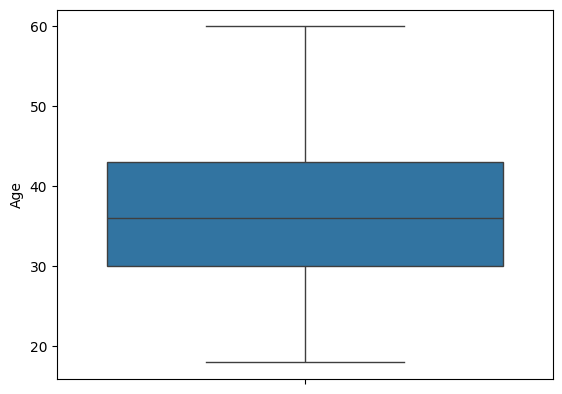

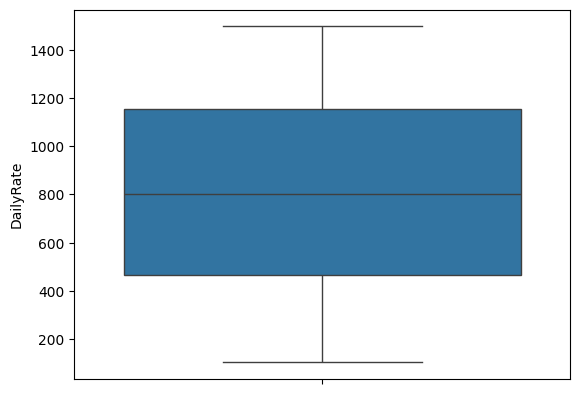

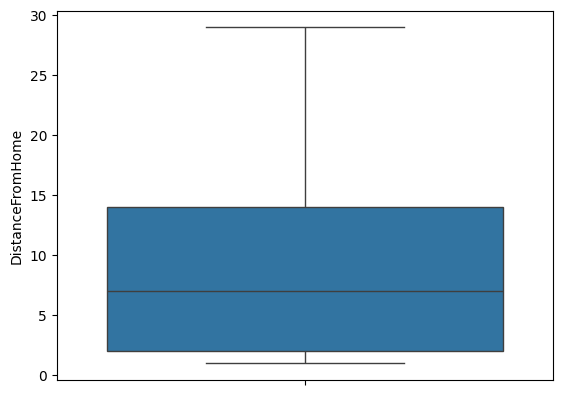

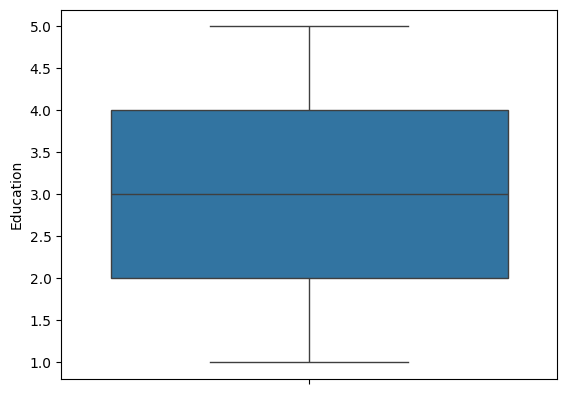

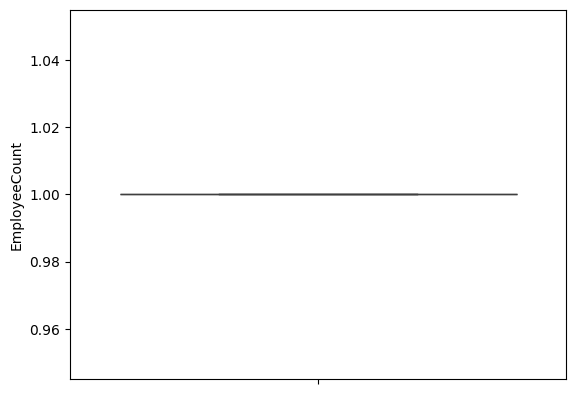

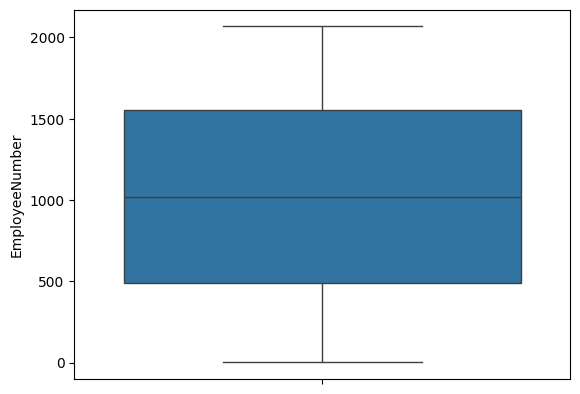

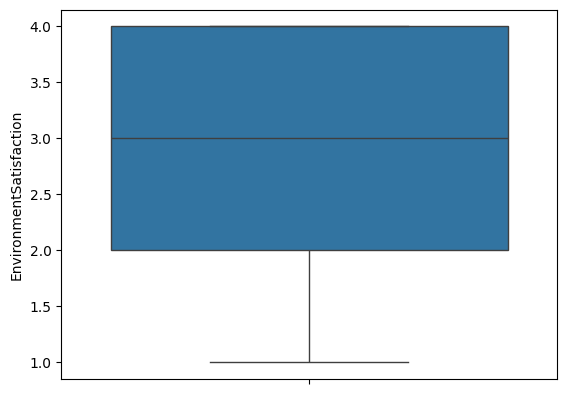

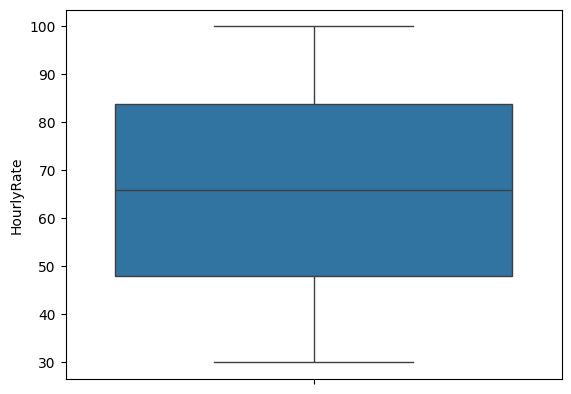

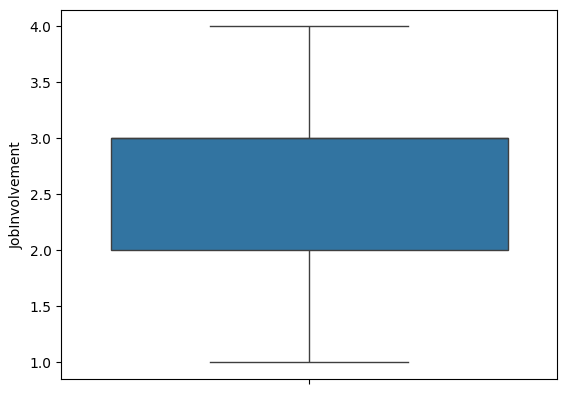

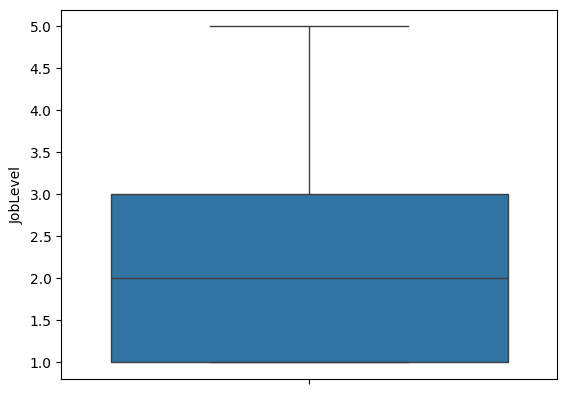

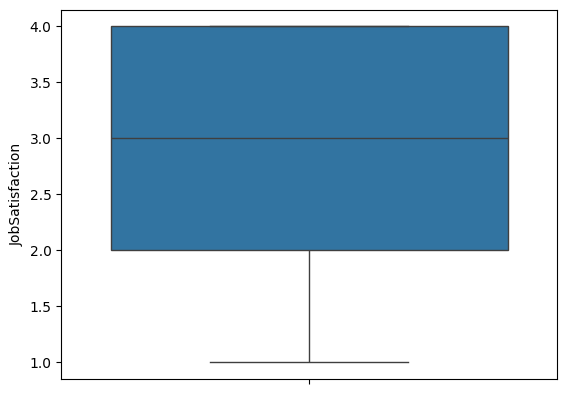

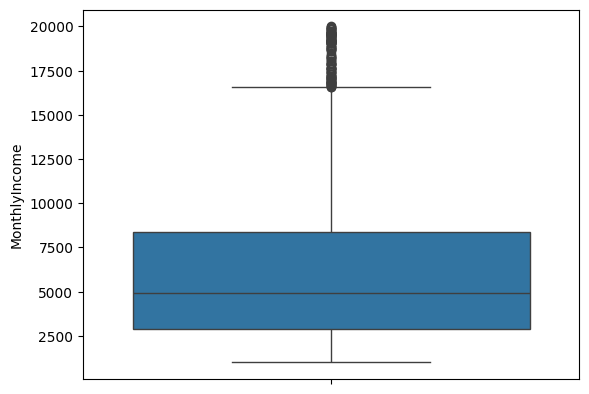

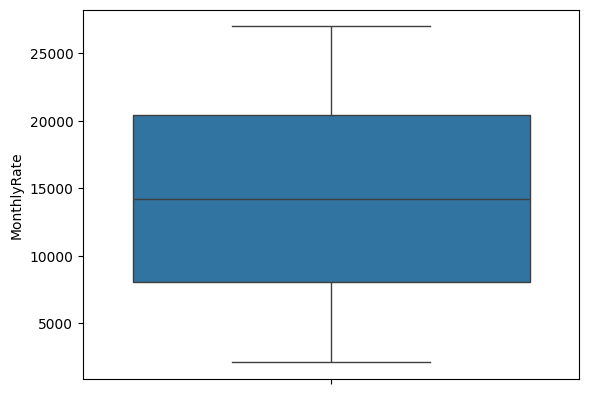

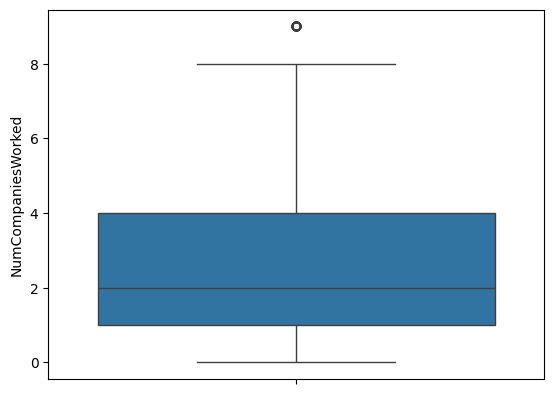

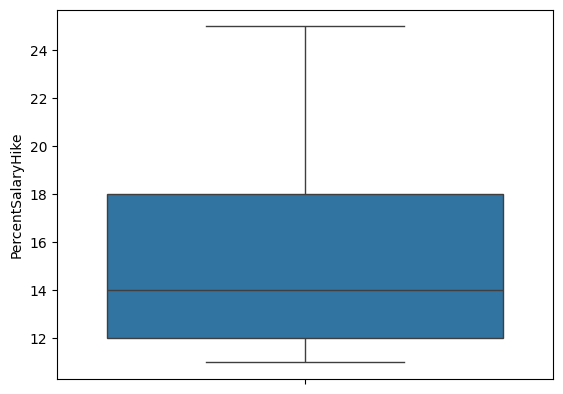

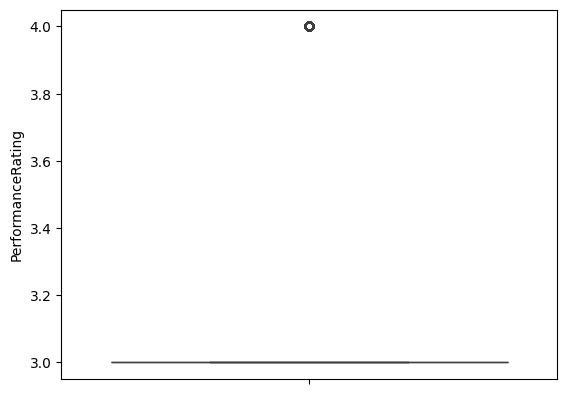

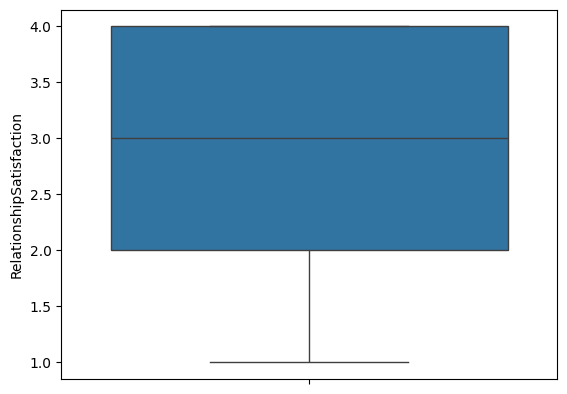

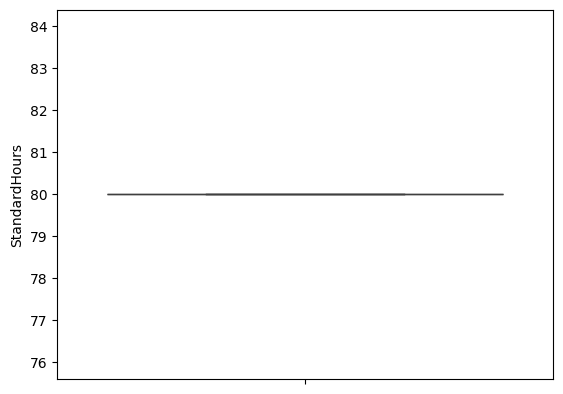

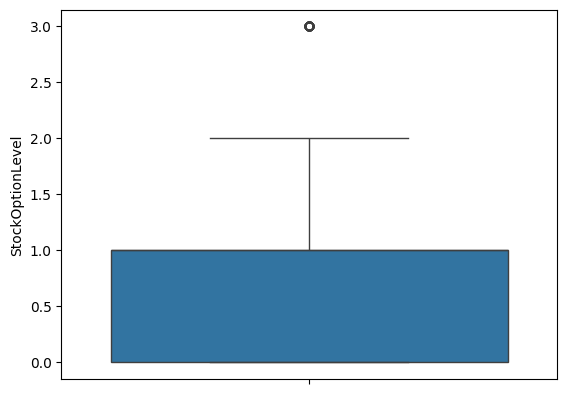

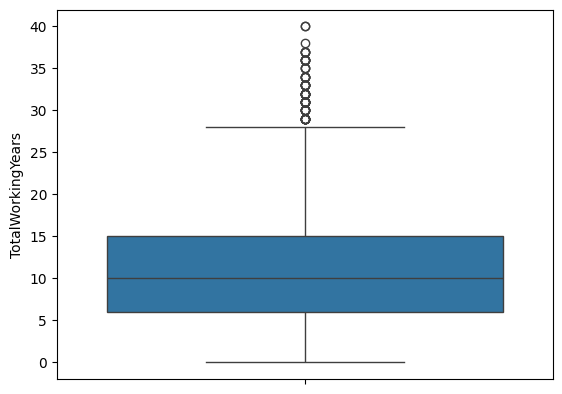

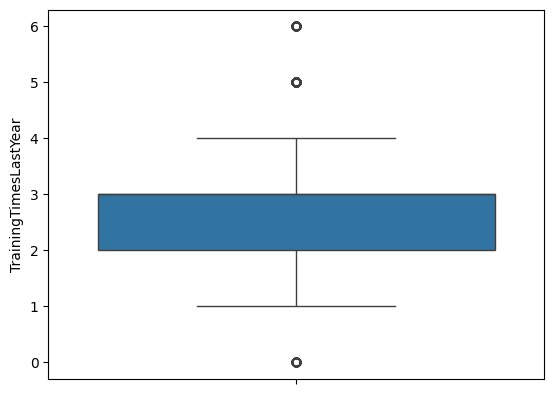

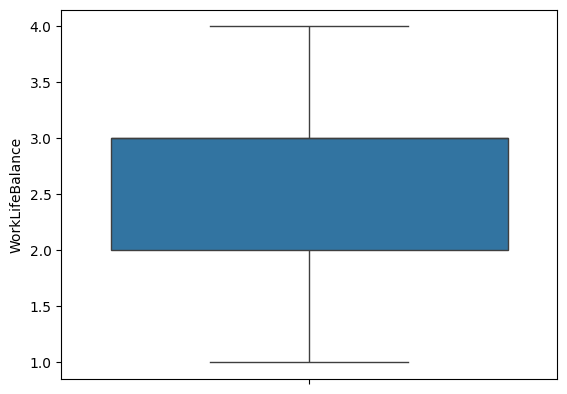

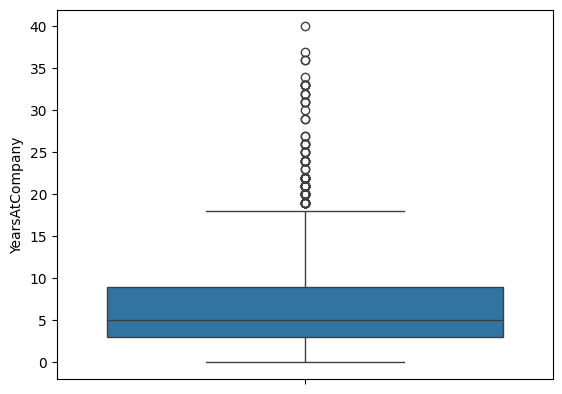

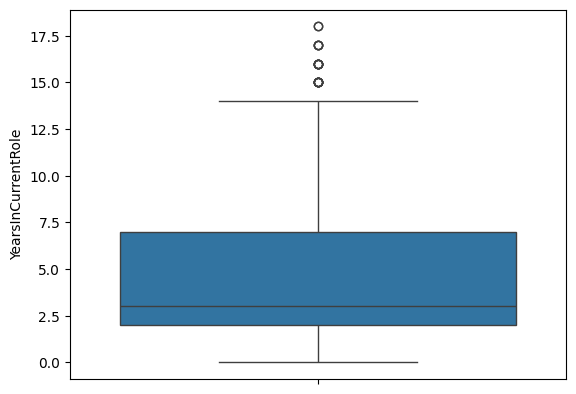

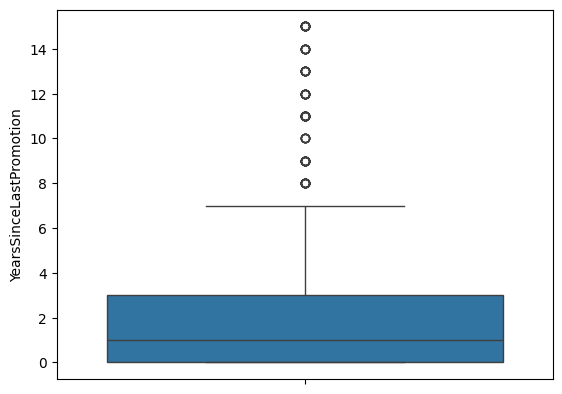

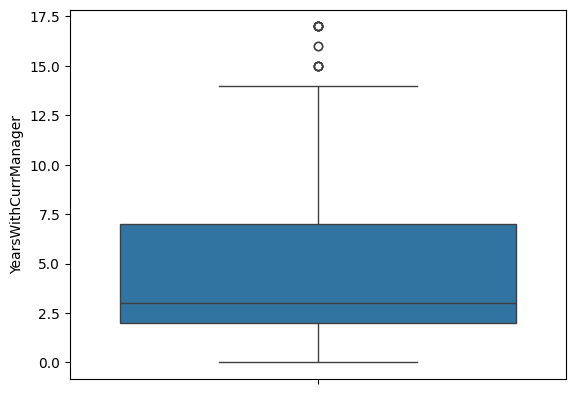

In [ ]:
#check for outliers
for col in num_cols:
  sns.boxplot(df[col])
  plt.show()

****Colmns that have outliers****
<br>
montlyincome , totalworkingyears ,
<br>
 yearsatcomany ,yearsincurrentrole ,
 <br>
 yearsSinceLastPromotion , yearswithcurrentmanager

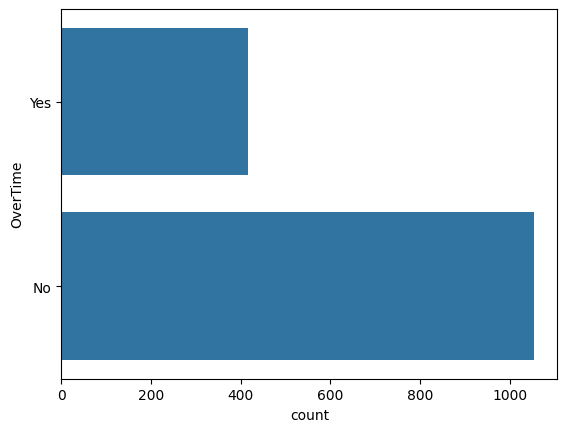

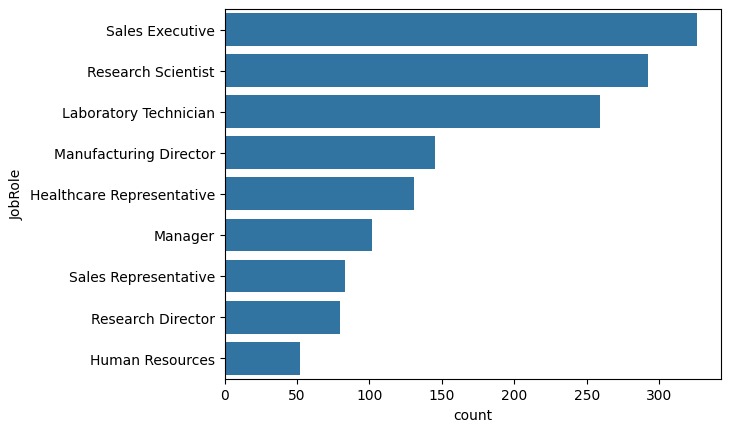

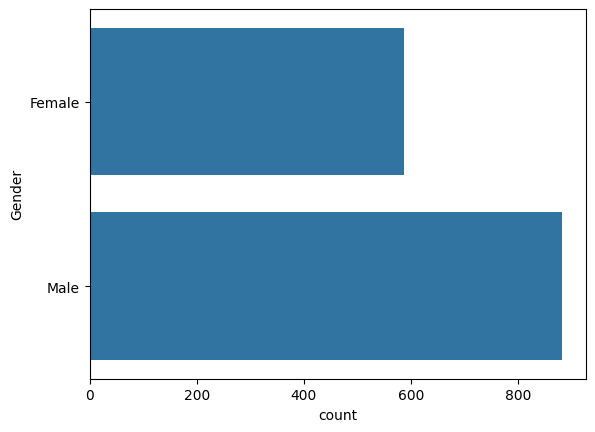

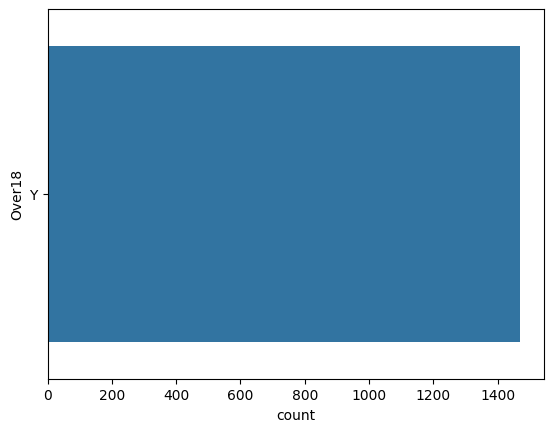

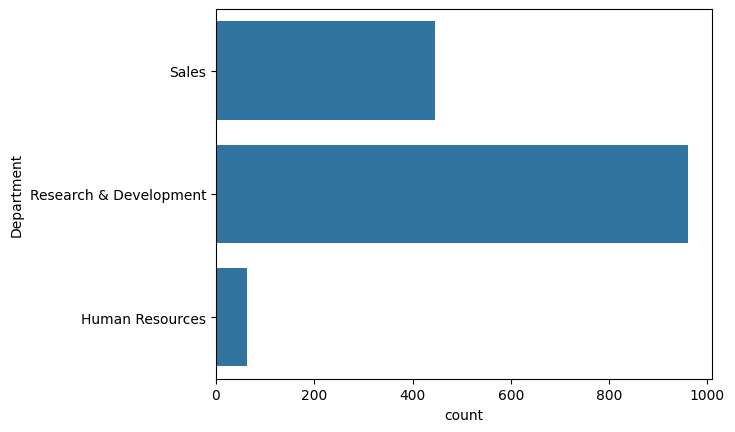

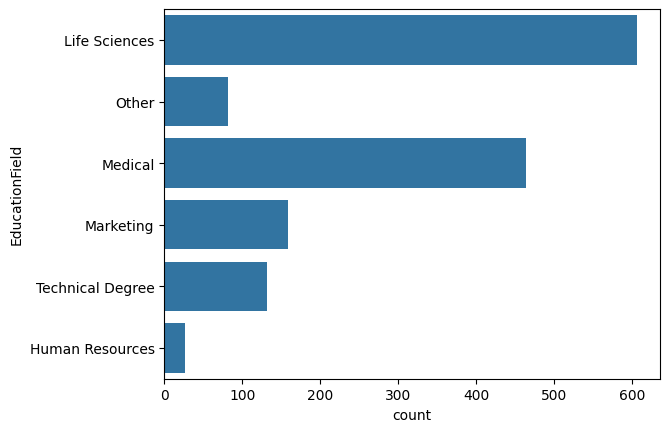

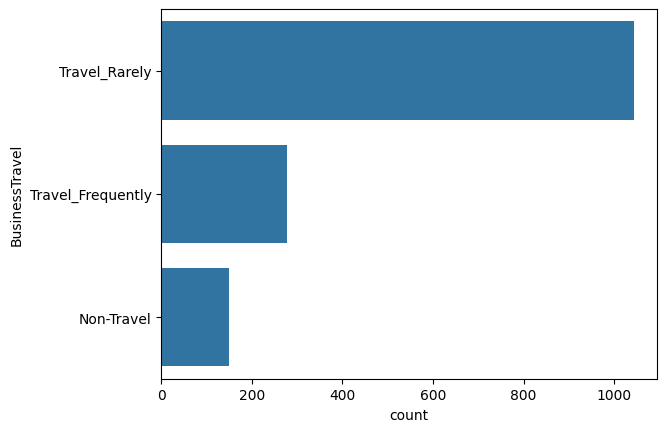

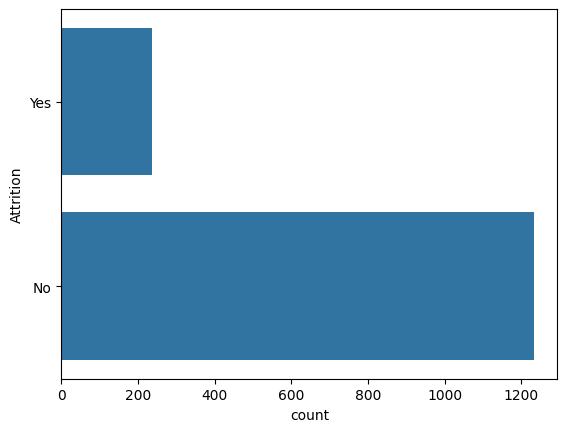

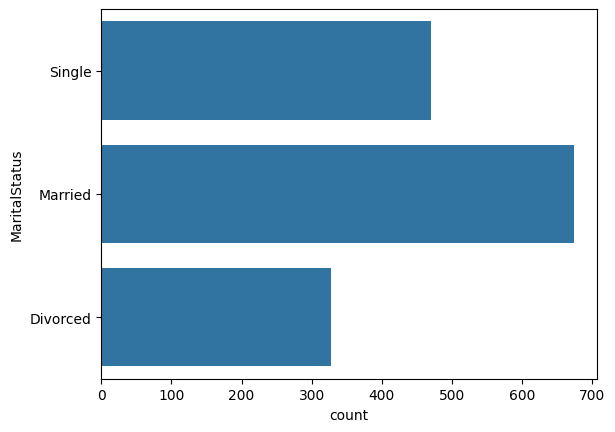

In [ ]:
for col in catg_cols:
  sns.countplot(df[col])
  plt.show()

###analysis


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#Male Attrition is more female
df.groupby('Attrition')['Gender'].value_counts(normalize=True)

Attrition  Gender
No         Male      0.593674
           Female    0.406326
Yes        Male      0.632911
           Female    0.367089
Name: proportion, dtype: float64

In [ ]:
#BusinessTravel is not ccause of Attrition
df.groupby('Attrition')['BusinessTravel'].value_counts(normalize=True)

Attrition  BusinessTravel   
No         Travel_Rarely        0.719384
           Travel_Frequently    0.168694
           Non-Travel           0.111922
Yes        Travel_Rarely        0.658228
           Travel_Frequently    0.291139
           Non-Travel           0.050633
Name: proportion, dtype: float64

In [ ]:
#Education in level 3 is more Attrition
df.groupby('Attrition')['Education'].value_counts(normalize=True)

Attrition  Education
No         3            0.383617
           4            0.275750
           2            0.193025
           1            0.112733
           5            0.034874
Yes        3            0.417722
           4            0.244726
           2            0.185654
           1            0.130802
           5            0.021097
Name: proportion, dtype: float64

In [ ]:
#it makes sensse people who in job level one , they are  more attrition
df.groupby('Attrition')['JobLevel'].value_counts(normalize=True)

Attrition  JobLevel
No         2           0.390916
           1           0.324412
           3           0.150852
           4           0.081914
           5           0.051906
Yes        1           0.603376
           2           0.219409
           3           0.135021
           4           0.021097
           5           0.021097
Name: proportion, dtype: float64

In [ ]:
#Laboratory Technician is more Attrition
df.groupby('Attrition')['JobRole'].value_counts(normalize=True)

Attrition  JobRole                  
No         Sales Executive              0.218167
           Research Scientist           0.198702
           Laboratory Technician        0.159773
           Manufacturing Director       0.109489
           Healthcare Representative    0.098946
           Manager                      0.078670
           Research Director            0.063260
           Sales Representative         0.040552
           Human Resources              0.032441
Yes        Laboratory Technician        0.261603
           Sales Executive              0.240506
           Research Scientist           0.198312
           Sales Representative         0.139241
           Human Resources              0.050633
           Manufacturing Director       0.042194
           Healthcare Representative    0.037975
           Manager                      0.021097
           Research Director            0.008439
Name: proportion, dtype: float64

In [ ]:
#people who left have MonthlyIncome less
df.groupby('Attrition')['MonthlyIncome'].median()

,MonthlyIncome
Attrition,
No,5204.0
Yes,3202.0


### Clean

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.drop(columns=['EmployeeCount' , 'EmployeeNumber' ,'StandardHours','Over18'] , inplace=True)

In [ ]:
lb =LabelEncoder()
hot = OneHotEncoder(sparse=False, drop='first')

In [ ]:
df['Attrition'] = lb.fit_transform(df['Attrition'])
df['BusinessTravel'] = lb.fit_transform(df['BusinessTravel'])
df['EducationField']= lb.fit_transform(df['EducationField'])
df['Gender']= lb.fit_transform(df['Gender'])
df['MaritalStatus']=lb.fit_transform(df['MaritalStatus'])
df['OverTime'] = lb.fit_transform(df['OverTime'])

In [ ]:
Department_df = pd.get_dummies(df['Department'] , drop_first=True)
JobRole_df = pd.get_dummies(df['JobRole'] , drop_first=True)


In [ ]:
df = pd.concat([df , JobRole_df ,Department_df] ,axis=1)

In [ ]:
df.drop(columns=['Department' ,'JobRole' ] , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int64
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobSatisfaction           1470 non-null   int64
 13  MaritalStatus             1470 non-null   int64
 14  MonthlyIncome             1470 non-null 

<Axes: >

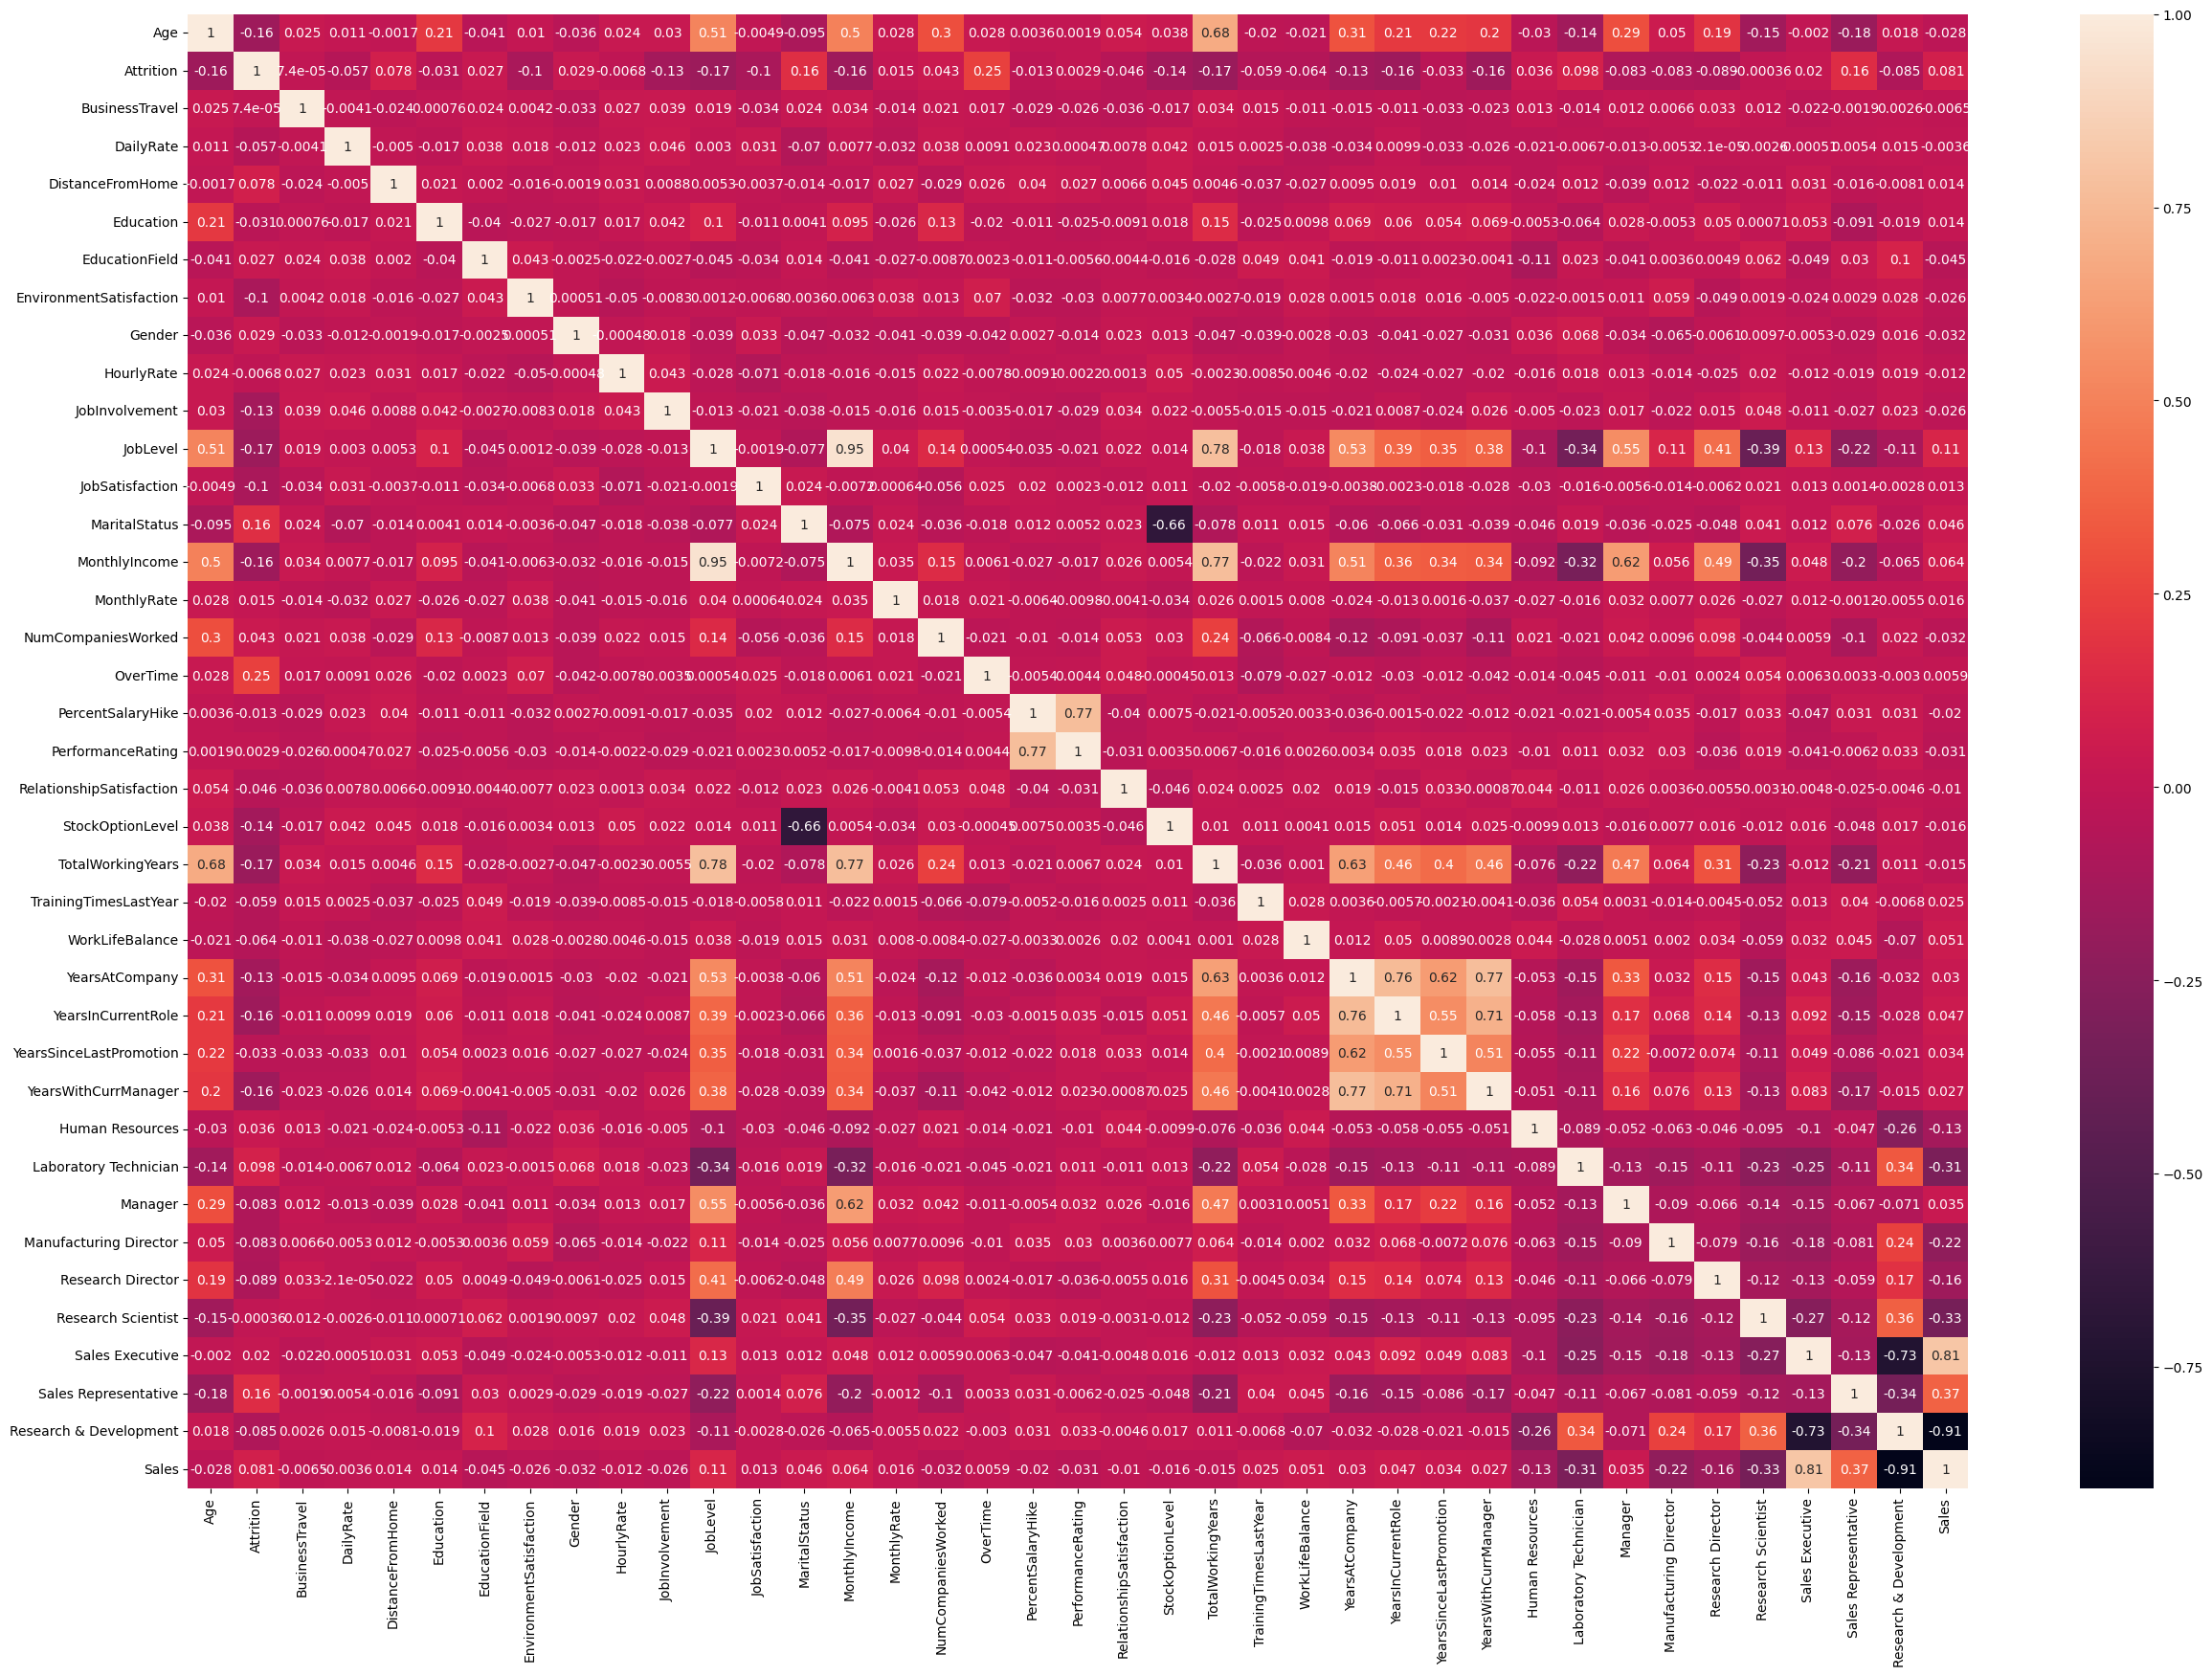

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr() , annot=True)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Human Resources', 'Laboratory Technician', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'Research & Development',
       'Sales'],
      dtype='object')

In [ ]:
sk =['DistanceFromHome' ,'JobLevel' ,'MonthlyIncome','PercentSalaryHike','NumCompaniesWorked' , 'PerformanceRating','StockOptionLevel','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
#log x<=0 is NAN
for c in sk:
  print(c , df[c].min())

DistanceFromHome 1
JobLevel 1
MonthlyIncome 1009
PercentSalaryHike 11
NumCompaniesWorked 0
PerformanceRating 3
StockOptionLevel 0
YearsAtCompany 0
YearsInCurrentRole 0
YearsSinceLastPromotion 0
YearsWithCurrManager 0


In [ ]:
#handle Skewness
df['DistanceFromHome'] = np.log(df['DistanceFromHome'])
df['JobLevel'] = np.log(df['JobLevel'])
df['MonthlyIncome'] = np.log(df['MonthlyIncome'])
df['PercentSalaryHike'] = np.log(df['PercentSalaryHike'])
df['PerformanceRating'] = np.log(df['PerformanceRating'])

<Axes: >

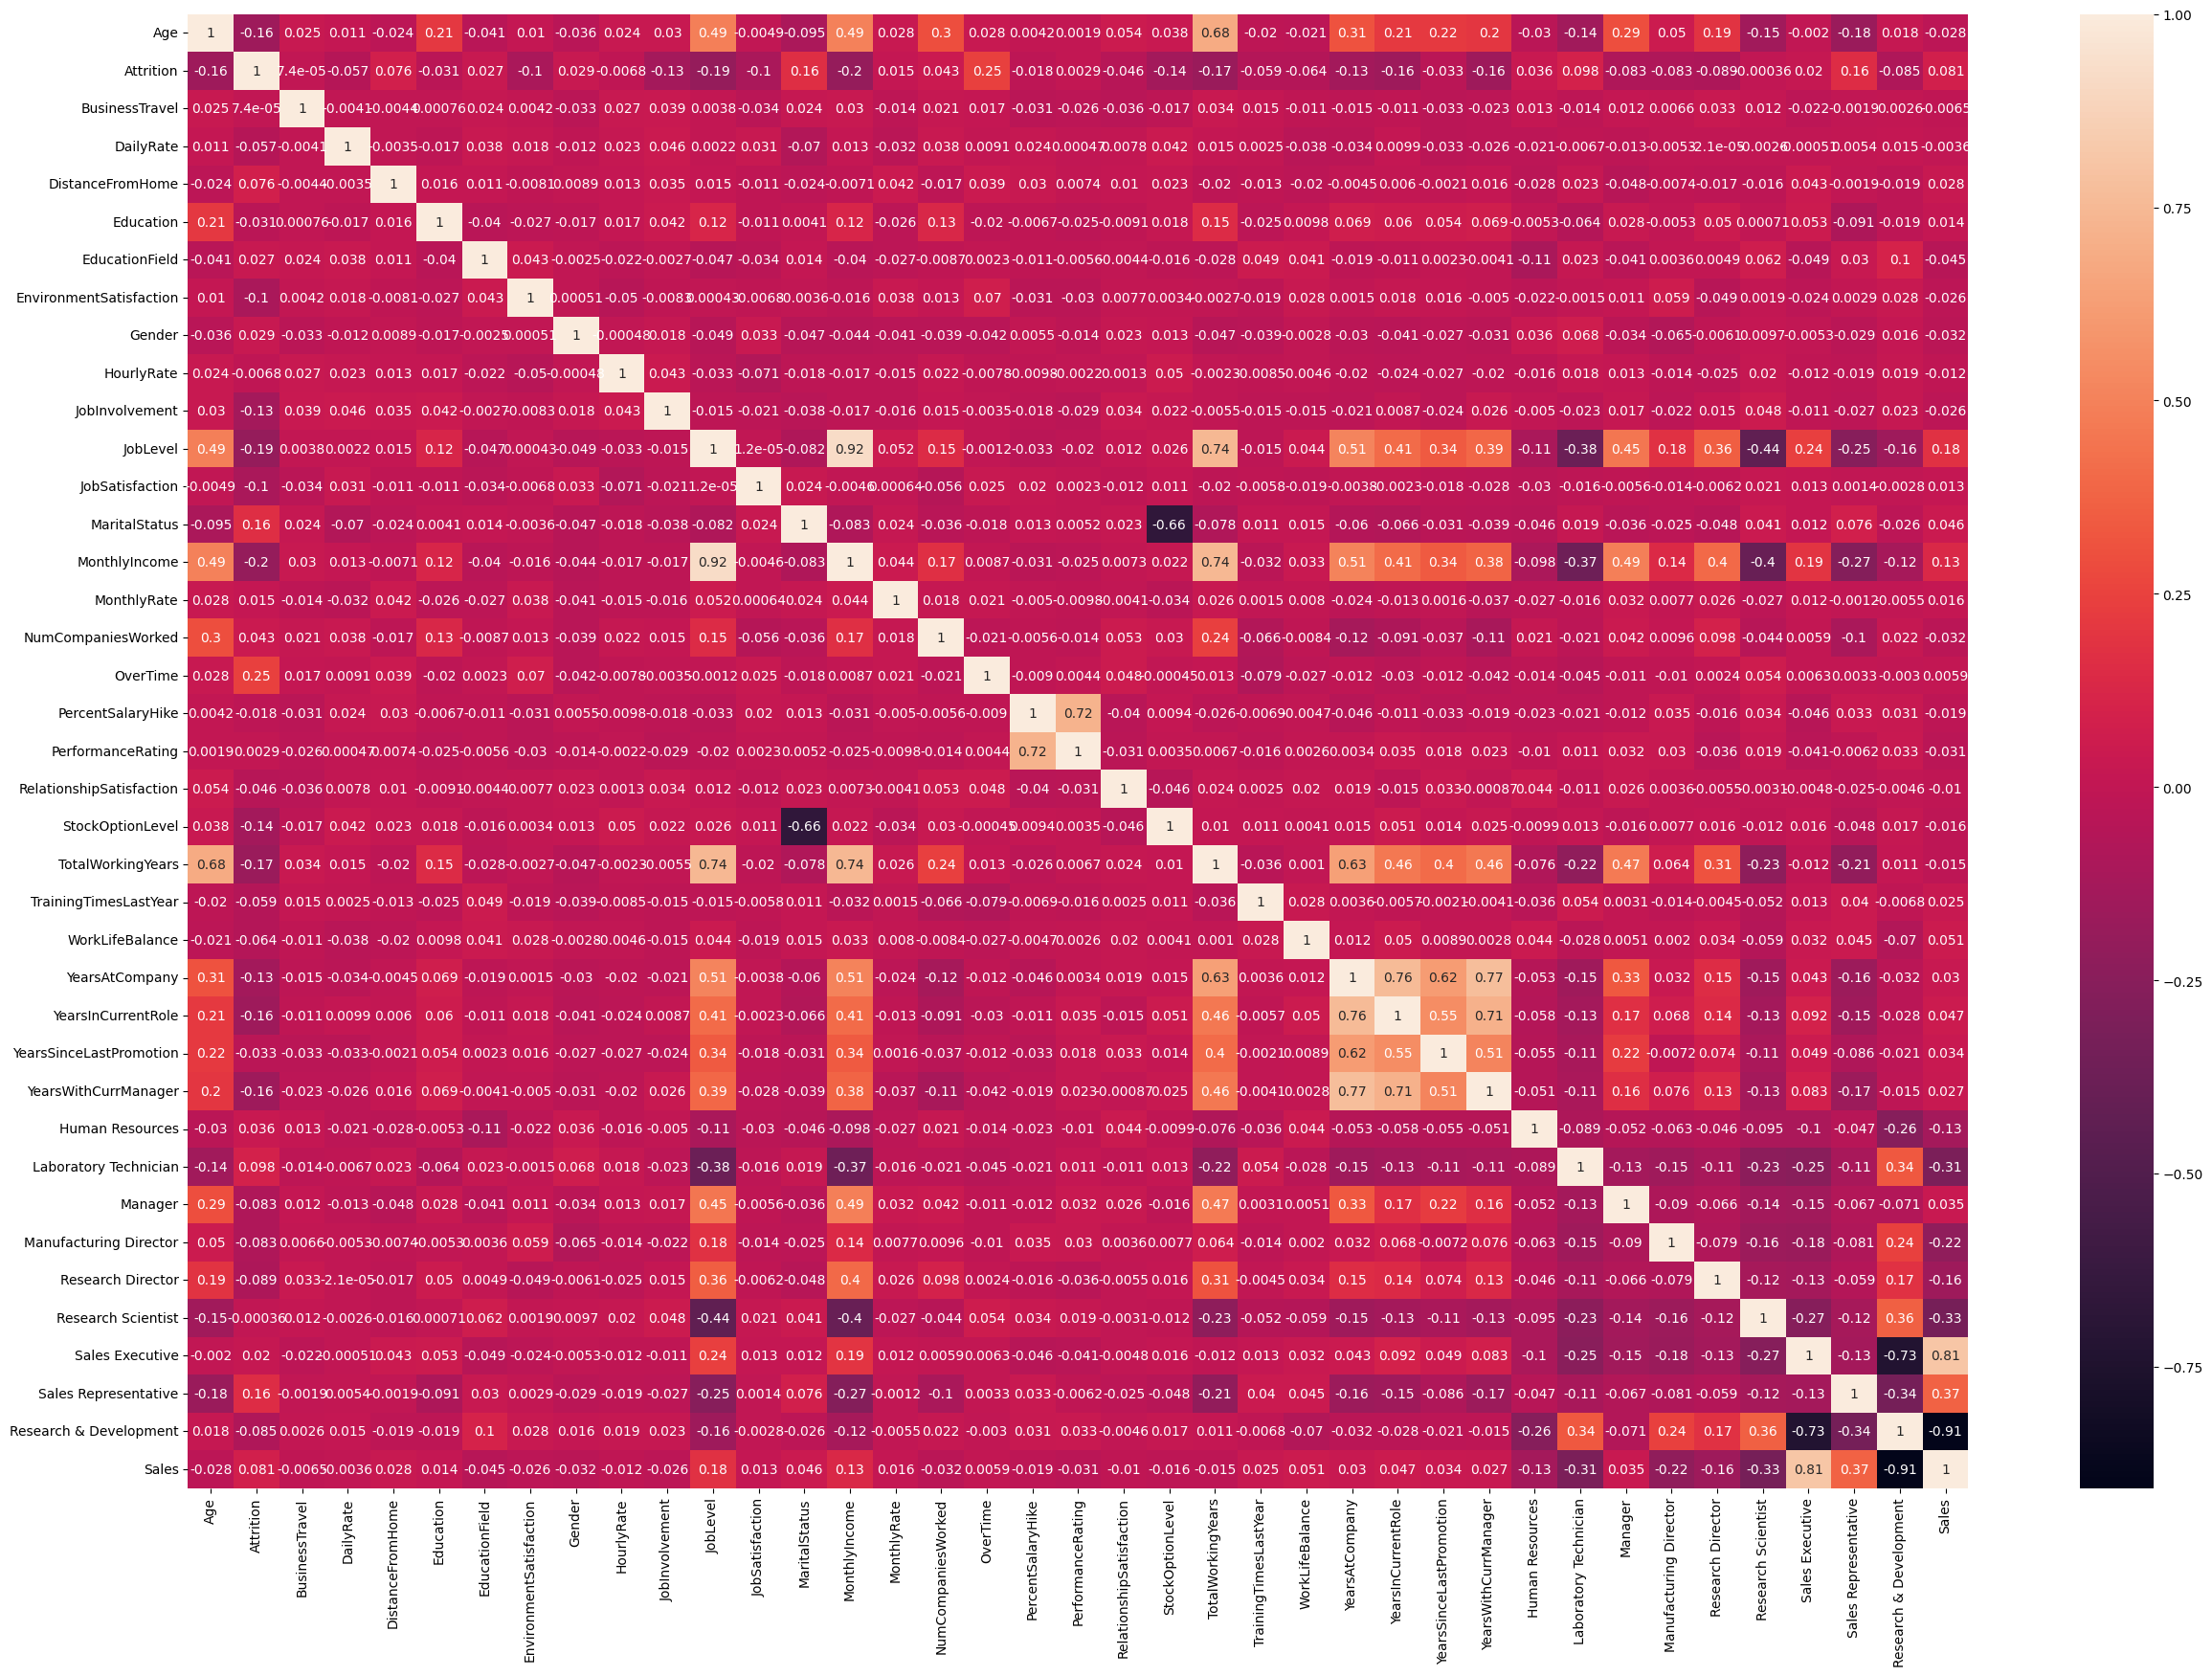

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr() , annot=True)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Human Resources', 'Laboratory Technician', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'Research & Development',
       'Sales'],
      dtype='object')

In [ ]:
#handel outliers
outliers_cols = df[['MonthlyIncome' ,'TotalWorkingYears' ,'YearsAtCompany' ,'YearsWithCurrManager' ,'YearsSinceLastPromotion' ,'YearsInCurrentRole']]
# cap Outliers to a maximum and minimum value within a reasonable range.
Q1 = outliers_cols.quantile(0.25)
Q3 = outliers_cols.quantile(0.75)
IQR = Q3 - Q1
for column in outliers_cols:
    upper_limit = Q3[column] + 1.5 * IQR[column]
    lower_limit = Q1[column] - 1.5 * IQR[column]
    df[column] = np.clip(df[column], lower_limit, upper_limit)


In [ ]:
X= df.drop(['Attrition','Sales' ,'JobLevel'], axis=1)
y=df['Attrition']

In [ ]:
sc = StandardScaler()

In [ ]:
df_0 = df[df['Attrition'] == 0]
df_1 = df[df['Attrition'] == 1]

## Apply Smote

In [ ]:
smote = SMOTE()

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)


(2466, 36)
(2466,)


### Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42 ,  shuffle=True)
X_train_scl = pd.DataFrame(sc.fit_transform(X_train) ,columns=X_train.columns)
X_test_scl = pd.DataFrame(sc.transform(X_test) ,columns=X_train.columns)

### model selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_scl,y_train)
y_prd = rf.predict(X_test_scl)
print(classification_report(y_test , y_prd))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       250
           1       0.95      0.89      0.92       244

    accuracy                           0.93       494
   macro avg       0.93      0.92      0.92       494
weighted avg       0.93      0.93      0.93       494

